# ノードの中心性

In [4]:
import numpy as np
import networkx as nx

%matplotlib inline

---

## クイズ

### Q1: 近接中心性
以下のグラフ$G_{bull}$に属する各ノードの近接中心性について，`closeness_centrality`関数を用いずに計算するコードを書きなさい．

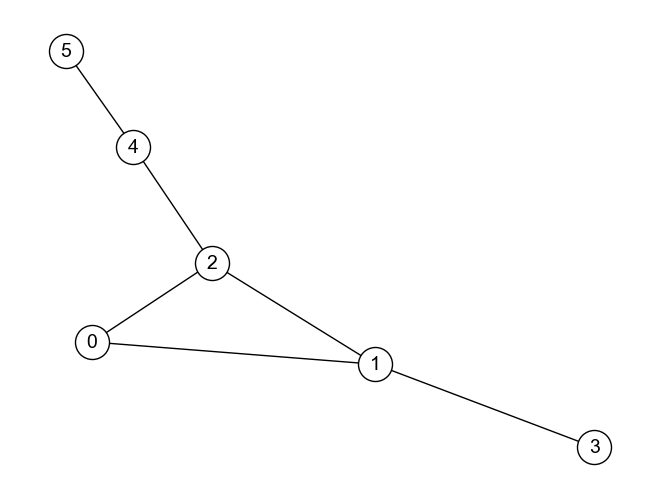

In [5]:
DRAW_CONFIG = {
    'node_color': 'white',
    'edgecolors': 'black', # line color of nodes
    'with_labels': True,
    'node_size': 600,
    'font_size': 14,
    'font_family': 'Arial',
}

G_bull = nx.Graph([(0, 1), (1, 2), (2, 0), (1, 3), (2, 4), (4, 5)])
pos = nx.spring_layout(G_bull, seed=12345)
nx.draw(G_bull, pos, **DRAW_CONFIG)

In [6]:
import networkx as nx

# グラフの定義
G_bull = nx.Graph([(0, 1), (1, 2), (2, 0), (1, 3), (2, 4), (4, 5)])

# 各ノードについて近接中心性の計算をする
for node_from in G_bull.nodes():
    dists = []
    for node_to in G_bull.nodes():
        if node_from != node_to:
            shortest_path = nx.shortest_path(G_bull, node_from, node_to)
            dist = len(shortest_path) - 1
            dists.append(dist)

    closeness_centrality = len(dists) / sum(dists)
    print(f'ノード{node_from}の近接中心性:', closeness_centrality)

ノード0の近接中心性: 0.5555555555555556
ノード1の近接中心性: 0.625
ノード2の近接中心性: 0.7142857142857143
ノード3の近接中心性: 0.4166666666666667
ノード4の近接中心性: 0.5555555555555556
ノード5の近接中心性: 0.38461538461538464


### Q2: どんなグラフ？

ノード数が5のグラフのうち，以下の条件を満たすノードを持つグラフの例を考えなさい．

1. 次数中心性，近接中心性，媒介中心性のいずれも最大値を持つノードが同一であるような無向グラフ
2. 次数中心性，近接中心性，媒介中心性の値がすべてのノードで同じになる無向グラフ
3. 出次数中心性は最大値を取るが，媒介中心性は最小値を取るノードが存在する有向グラフ

次数中心性: {0: 1.0, 1: 0.25, 2: 0.25, 3: 0.25, 4: 0.25}
近接中心性: {0: 1.0, 1: 0.5714285714285714, 2: 0.5714285714285714, 3: 0.5714285714285714, 4: 0.5714285714285714}
媒介中心性: {0: 1.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0}


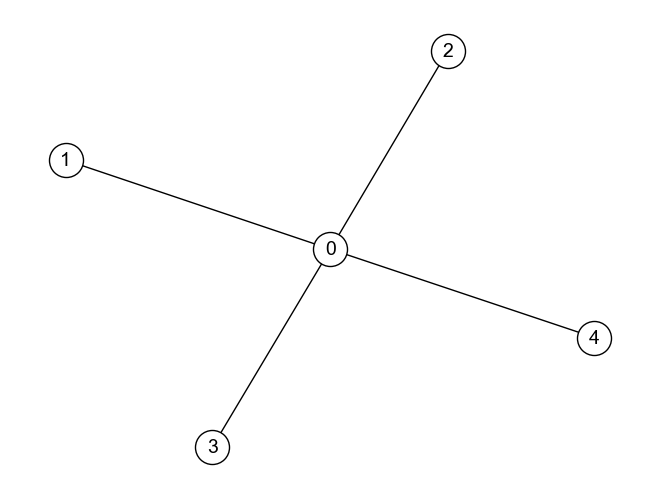

In [7]:
# グラフの定義
G_Q2_1 = nx.star_graph(4)
nx.draw(G_Q2_1, **DRAW_CONFIG)

# 各中心性スコア
print('次数中心性:', nx.degree_centrality(G_Q2_1))
print('近接中心性:', nx.closeness_centrality(G_Q2_1))
print('媒介中心性:', nx.betweenness_centrality(G_Q2_1))

次数中心性: {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0}
近接中心性: {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0}
媒介中心性: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0}


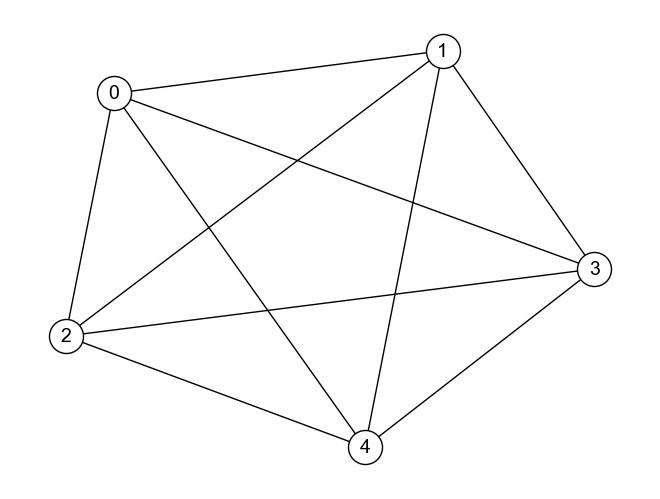

In [8]:
# グラフの定義
G_Q2_2 = nx.complete_graph(5)
nx.draw(G_Q2_2, **DRAW_CONFIG)

# 各中心性スコア
print('次数中心性:', nx.degree_centrality(G_Q2_2))
print('近接中心性:', nx.closeness_centrality(G_Q2_2))
print('媒介中心性:', nx.betweenness_centrality(G_Q2_2))

出次数中心性: {0: 1.0, 1: 0.25, 2: 0.25, 3: 0.25, 4: 0.25}
近接中心性: {0: 0.0, 1: 0.5714285714285714, 2: 0.5714285714285714, 3: 0.5714285714285714, 4: 0.5714285714285714}
媒介中心性: {0: 0.0, 1: 0.25, 2: 0.25, 3: 0.25, 4: 0.25}


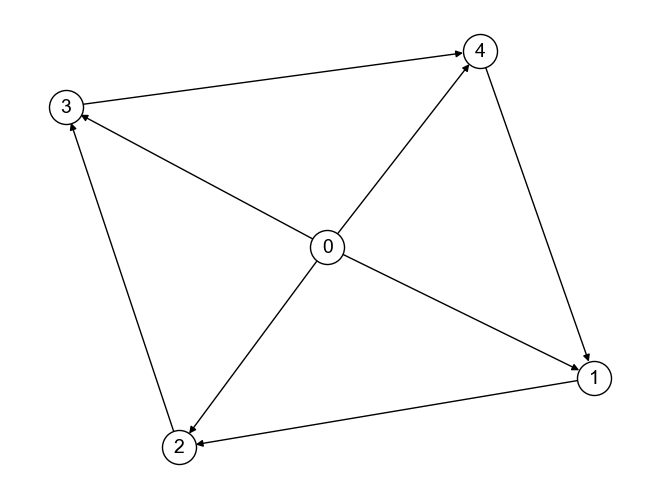

In [9]:
# グラフの定義
G_Q2_3 = nx.DiGraph([
    (0, 1), (0, 2), (0, 3), (0, 4),
#    (1, 0), (2, 0), (3, 0), (4, 0),
    (1, 2), (2, 3), (3, 4), (4, 1)
])
pos = nx.spring_layout(G_Q2_3, seed=123)
nx.draw(G_Q2_3, pos, **DRAW_CONFIG)

# 各中心性スコア
print('出次数中心性:', nx.out_degree_centrality(G_Q2_3))
print('近接中心性:', nx.closeness_centrality(G_Q2_3))
print('媒介中心性:', nx.betweenness_centrality(G_Q2_3))

### Q3: 都道府県の近接中心性，次数中心性，媒介中心性

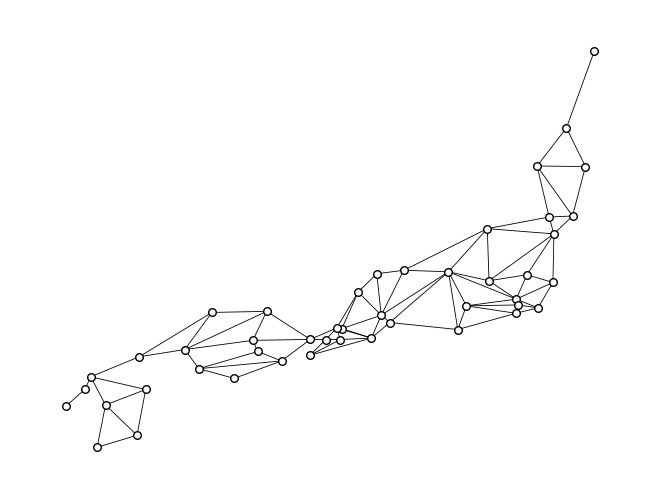

In [9]:
import pandas as pd

QUIZ_DRAW_CONFIG = {
    'node_size': 30,
    'with_labels': False,
    'width': 0.6,
    'edgecolors': 'black',
    'node_color': 'white',
}

G_prefecture = nx.read_adjlist("data/prefecture/prefecture.adjlist")

url = "https://gist.githubusercontent.com/ctsaran/42728dad3c7d8bd91f1d/raw/017718dde64f70e221f0e2bb0487a6c975d6195d/gistfile1.txt"
df = pd.read_table(url, sep='\t', header=None)
df.columns = ['pid', 'prefecture', 'lat', 'lng']
pos = {row['prefecture']: (row['lng'], row['lat']) for _, row in df.iterrows()}

nx.draw(G_prefecture, pos, **QUIZ_DRAW_CONFIG)

上のグラフ$G_{prefecture}$は，沖縄県を除く日本の都道府県をノード，都道府県間の陸路の存在をエッジとして可視化したものである．
グラフ$G_{prefecture}$に含まれる各ノード（都道府県）について，その近接中心性，次数中心性，媒介中心性を計算し，各指標の上位3件を求めなさい．

なお，グラフ$G_{prefecture}$に関するデータは[コチラ](data/prefecture/prefecture.adjlist)からダウンロード可能である．
また，以下のコードを書くとダウンロードしたファイルをNetworkX形式のグラフとして読み込める．

In [25]:
import networkx as nx

# ダウンロードしたデータは`data/prefecture/prefecture.adjlist`にあると想定
G_prefecture = nx.read_adjlist("data/prefecture/prefecture.adjlist")

In [20]:
# 近接中心性
sorted(nx.closeness_centrality(G_prefecture).items(), key=lambda x: -x[1])[:3]

[('三重県', 0.26011560693641617),
 ('岐阜県', 0.2571428571428571),
 ('京都府', 0.2556818181818182)]

In [16]:
# 次数中心性
sorted(nx.degree_centrality(G_prefecture).items(), key=lambda x: -x[1])[:3]

[('長野県', 0.17777777777777778),
 ('埼玉県', 0.15555555555555556),
 ('岐阜県', 0.15555555555555556)]

In [17]:
# 媒介中心性
sorted(nx.betweenness_centrality(G_prefecture).items(), key=lambda x: -x[1])[:3]

[('兵庫県', 0.4714646464646465),
 ('京都府', 0.45496477035870975),
 ('長野県', 0.3308831387467748)]

### Q4: 空港の次数中心性，媒介中心性，固有ベクトル中心性

In [26]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

G_ana = nx.read_adjlist("../data/airport/ana.adjlist")

AIRPORT_DRAW_CONFIG = {
    'node_size': 5,
    'font_size': 8,
    'with_labels': True,
    'edge_color': 'cornflowerblue',
    'width': 0.50,
    'font_family': 'IPAPGothic'
}

plt.figure(figsize=(10,6))
pos = nx.spring_layout(G_ana, iterations=50, seed=1234, k=0.5)
nx.draw(G_ana, pos, **AIRPORT_DRAW_CONFIG)
plt.show()

../_build/html/airport.html


In [ ]:
from IPython.display import IFrame
IFrame("../../airport.html", width=750, height=650)

上のグラフ$G_{airport}$は，日本の主要な空港をノード，空港間でANA（全日空）の航路が存在することをエッジとして可視化したものである．
グラフ$G_{airport}$に含まれる各ノード（空港）について，その次数中心性，媒介中心性，固有ベクトル中心性を計算し，各指標の上位5件を求めなさい．

なお，グラフ$G_{airport}$に関するデータは[コチラ](data/airport/ana.adjlist)からダウンロード可能である．
また，以下のコードを書くとダウンロードしたファイルをNetworkX形式のグラフとして読み込める．

In [12]:
import networkx as nx

# ダウンロードしたデータは`data/airport/ana.adjlist`にあると想定
G_ana = nx.read_adjlist("../data/airport/ana.adjlist")

In [14]:
# 次数中心性
sorted(nx.degree_centrality(G_ana).items(), key=lambda x: -x[1])[:5]

[('東京（羽田）', 0.7),
 ('札幌（新千歳）', 0.3833333333333333),
 ('沖縄（那覇）', 0.3333333333333333),
 ('大阪（伊丹）', 0.3),
 ('名古屋（中部）', 0.25)]

In [15]:
# 媒介中心性
sorted(nx.betweenness_centrality(G_ana).items(), key=lambda x: -x[1])[:5]

[('東京（羽田）', 0.6089280368093929),
 ('鹿児島', 0.14800690521029508),
 ('札幌（新千歳）', 0.132759359284783),
 ('沖縄（那覇）', 0.11018556459234428),
 ('大阪（伊丹）', 0.09039116878099929)]

In [13]:
# 固有ベクトル中心性
sorted(nx.eigenvector_centrality(G_ana).items(), key=lambda x: -x[1])[:5]

[('東京（羽田）', 0.457999320160654),
 ('沖縄（那覇）', 0.3074869102083056),
 ('札幌（新千歳）', 0.3064340279779271),
 ('大阪（伊丹）', 0.29359335171993056),
 ('名古屋（中部）', 0.27764154174853667)]